In [22]:
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.sql.functions import corr, countDistinct, count
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

In [23]:
spark = SparkSession.builder.appName('IO').getOrCreate()

ConnectionRefusedError: [WinError 10061] Nie można nawiązać połączenia, ponieważ komputer docelowy aktywnie go odmawia

In [3]:
schema = StructType([
    StructField("Index", IntegerType(), True),
    StructField("Name", StringType(), True),
    StructField("Sex", StringType(), True),
    StructField("Age", DoubleType(), True),
    StructField("Team", StringType(), True),
    StructField("NOC", StringType(), True),
    StructField("Games", StringType(), True),
    StructField("Year", IntegerType(), True),
    StructField("Season", StringType(), True),
    StructField("City", StringType(), True),
    StructField("Sport", StringType(), True),
    StructField("Event", StringType(), True),
    StructField("Medal", StringType(), True),
])

In [4]:
summer_athletes = spark.read.format("csv").option("header", "true").option("delimiter", ",") \
  .option("quote", "\"") \
  .option("escape", "\"") \
  .schema(schema) \
  .load("Athletes_summer_games.csv")

# Time 4.4s

In [5]:
summer_athletes.show()

# Time 2.7s

+-----+--------------------+---+----+--------------+---+-----------+----+------+-----------+----------+--------------------+------+
|Index|                Name|Sex| Age|          Team|NOC|      Games|Year|Season|       City|     Sport|               Event| Medal|
+-----+--------------------+---+----+--------------+---+-----------+----+------+-----------+----------+--------------------+------+
|    0|           A Dijiang|  M|24.0|         China|CHN|1992 Summer|1992|Summer|  Barcelona|Basketball|Basketball Men's ...|  null|
|    1|            A Lamusi|  M|23.0|         China|CHN|2012 Summer|2012|Summer|     London|      Judo|Judo Men's Extra-...|  null|
|    2| Gunnar Nielsen Aaby|  M|24.0|       Denmark|DEN|1920 Summer|1920|Summer|  Antwerpen|  Football|Football Men's Fo...|  null|
|    3|Edgar Lindenau Aabye|  M|34.0|Denmark/Sweden|DEN|1900 Summer|1900|Summer|      Paris|Tug-Of-War|Tug-Of-War Men's ...|  Gold|
|   26|Cornelia "Cor" Aa...|  F|18.0|   Netherlands|NED|1932 Summer|1932|Sum

In [6]:
summer_athletes.printSchema()

# Time 0.0s

root
 |-- Index: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [113]:
num_row = summer_athletes.count()
num_col = len(summer_athletes.columns)

print("Summer Athletes Data Frame shape: ", num_col, ".", num_row)

# Time 0.2s

Summer Athletes Data Frame shape:  13 . 237673


In [114]:
desc = summer_athletes.describe()

desc.show()

# Time 7.5s

+-------+------------------+--------------------+------+------------------+-----------+------+-----------+------------------+------+---------+--------------+--------------------+------+
|summary|             Index|                Name|   Sex|               Age|       Team|   NOC|      Games|              Year|Season|     City|         Sport|               Event| Medal|
+-------+------------------+--------------------+------+------------------+-----------+------+-----------+------------------+------+---------+--------------+--------------------+------+
|  count|            237673|              237673|237673|            228484|     237673|237673|     237673|            237673|237673|   237673|        237673|              237673| 36537|
|   mean|126947.99052058921|                null|  null|25.746266697011606|       null|  null|       null|1979.0962456820926|  null|     null|          null|                null|  null|
| stddev|  82093.4601040641|                null|  null| 6.63872048119

In [31]:
count_value_of_teams = summer_athletes.groupBy("Team").count()
count_value_of_teams = count_value_of_teams.orderBy("count", ascending=False)
count_value_of_teams.printSchema()
count_value_of_teams.show()

# Time 0.6s

root
 |-- Team: string (nullable = true)
 |-- count: long (nullable = false)

+-------------+-----+
|         Team|count|
+-------------+-----+
|United States|15002|
|Great Britain|10842|
|       France|10554|
|        Italy| 8575|
|      Germany| 7960|
|    Australia| 7605|
|       Canada| 7170|
|        Japan| 7020|
|      Hungary| 6326|
|       Sweden| 5987|
|  Netherlands| 5429|
|        Spain| 5259|
|       Poland| 5112|
|        China| 4753|
| Soviet Union| 4584|
|  Switzerland| 4129|
|       Brazil| 4124|
|       Russia| 4088|
|  South Korea| 3922|
|      Romania| 3842|
+-------------+-----+
only showing top 20 rows



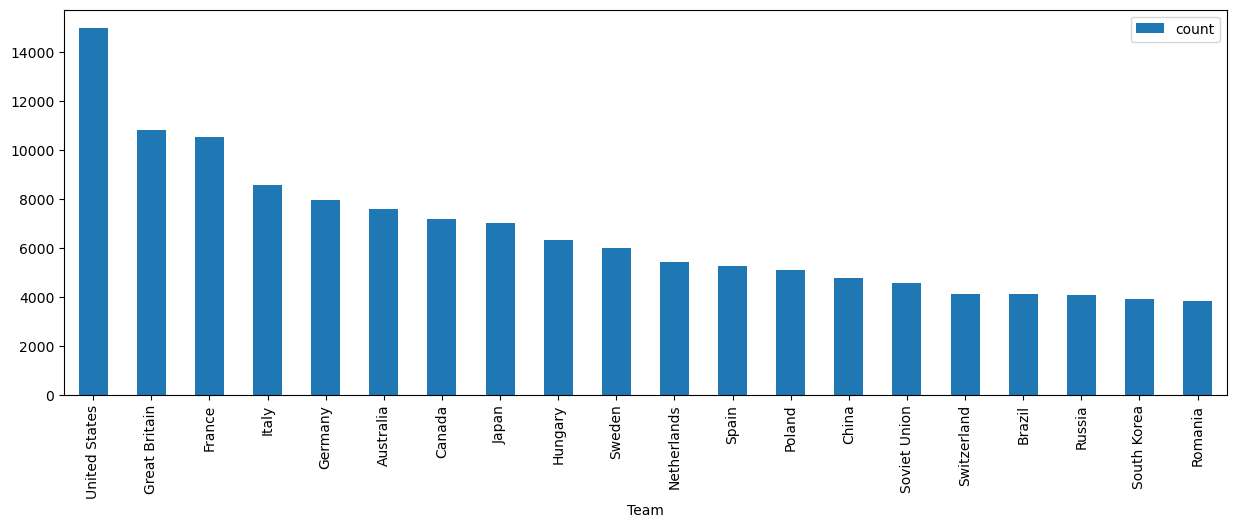

In [32]:
df =  count_value_of_teams.limit(20).toPandas()

df.plot(kind='bar', x='Team', y='count', figsize=(15,5))
plt.show()

# Time 0.7s

<AxesSubplot:>

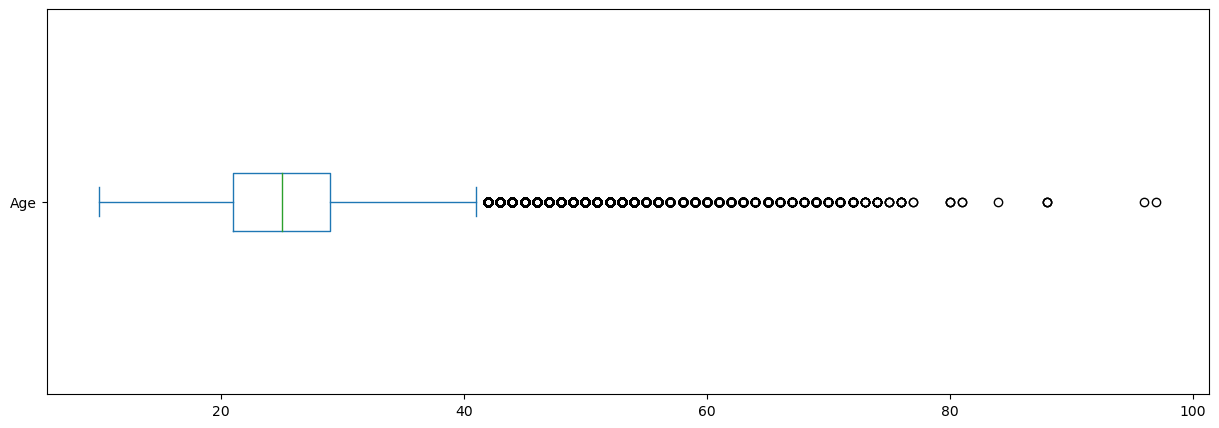

In [116]:
age_of_athletes = summer_athletes.select("Age")

age_of_athletes_pandas = age_of_athletes.toPandas()
age_of_athletes_pandas.plot(kind='box', vert=False, figsize=(15,5))

# Time 1.0s

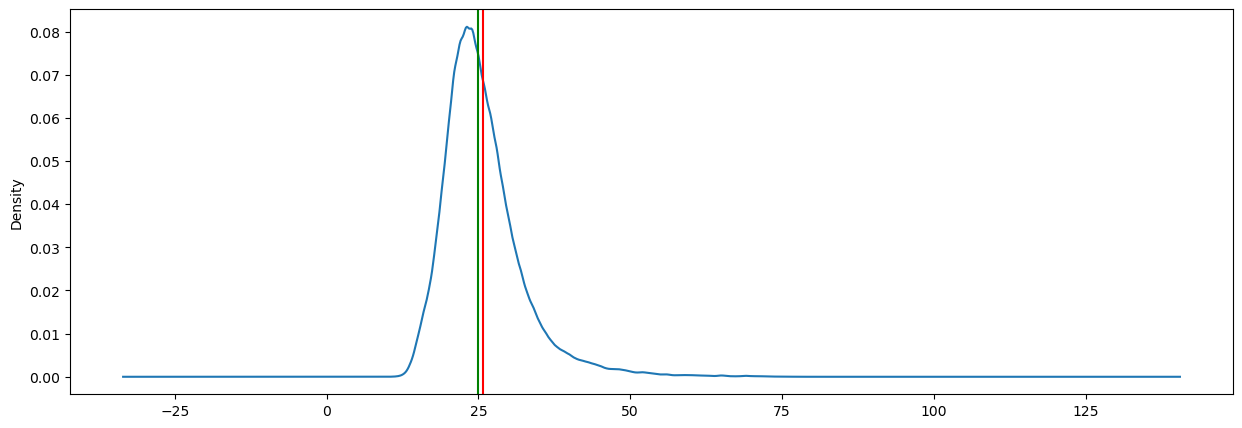

In [115]:
ax = age_of_athletes_pandas['Age'].plot(kind='density', figsize=(15,5))
ax.axvline(age_of_athletes_pandas['Age'].mean(), color='red')
ax.axvline(age_of_athletes_pandas['Age'].median(), color='green')

# Time 8.6s

<AxesSubplot:ylabel='Frequency'>

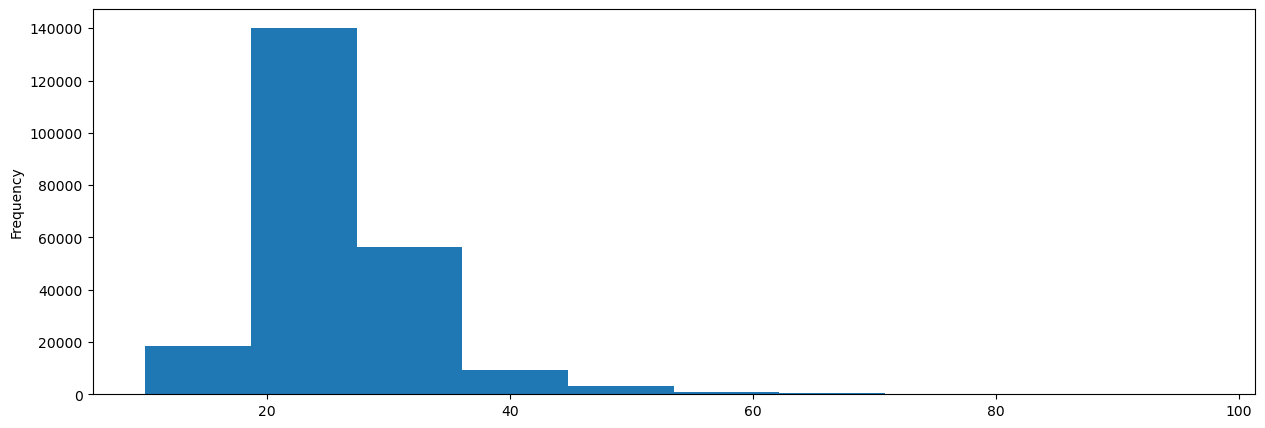

In [136]:
age_of_athletes_pandas['Age'].plot(kind='hist', figsize=(15,5))

# Time 0.2s

In [117]:
summer_athletes.agg({'Age':'mean'}).show()

# Time 0.2s

+------------------+
|          avg(Age)|
+------------------+
|25.746266697011606|
+------------------+



In [118]:
summer_athletes.agg({'Age':'min'}).show()

# Time 0.1s

+--------+
|min(Age)|
+--------+
|    10.0|
+--------+



In [119]:
summer_athletes.where(summer_athletes.Age == 10).show()

# Time 0.3s

+------+------------------+---+----+--------------------+---+-----------+----+------+------+----------+--------------------+------+
| Index|              Name|Sex| Age|                Team|NOC|      Games|Year|Season|  City|     Sport|               Event| Medal|
+------+------------------+---+----+--------------------+---+-----------+----+------+------+----------+--------------------+------+
|142882|Dimitrios Loundras|  M|10.0|Ethnikos Gymnasti...|GRE|1896 Summer|1896|Summer|Athina|Gymnastics|Gymnastics Men's ...|Bronze|
+------+------------------+---+----+--------------------+---+-----------+----+------+------+----------+--------------------+------+



In [120]:
summer_athletes.agg({'Age':'max'}).show()

# Time 0.1s

+--------+
|max(Age)|
+--------+
|    97.0|
+--------+



In [121]:
summer_athletes.where(summer_athletes.Age == 97).show()

# Time 0.3s

+------+--------------------+---+----+-------------+---+-----------+----+------+---------+----------------+--------------------+-----+
| Index|                Name|Sex| Age|         Team|NOC|      Games|Year|Season|     City|           Sport|               Event|Medal|
+------+--------------------+---+----+-------------+---+-----------+----+------+---------+----------------+--------------------+-----+
|257054|John Quincy Adams...|  M|97.0|United States|USA|1928 Summer|1928|Summer|Amsterdam|Art Competitions|Art Competitions ...| null|
+------+--------------------+---+----+-------------+---+-----------+----+------+---------+----------------+--------------------+-----+



+----+--------+
|Year|min(Age)|
+----+--------+
|1896|    10.0|
|1924|    13.0|
|1908|    14.0|
|1952|    13.0|
|1956|    13.0|
|1988|    13.0|
|1968|    11.0|
|1904|    14.0|
|2004|    13.0|
|1932|    13.0|
|1996|    12.0|
|1960|    12.0|
|2012|    13.0|
|1912|    13.0|
|2016|    13.0|
|1936|    12.0|
|1920|    13.0|
|1906|    13.0|
|1980|    13.0|
|1972|    12.0|
+----+--------+
only showing top 20 rows



<AxesSubplot:xlabel='Year'>

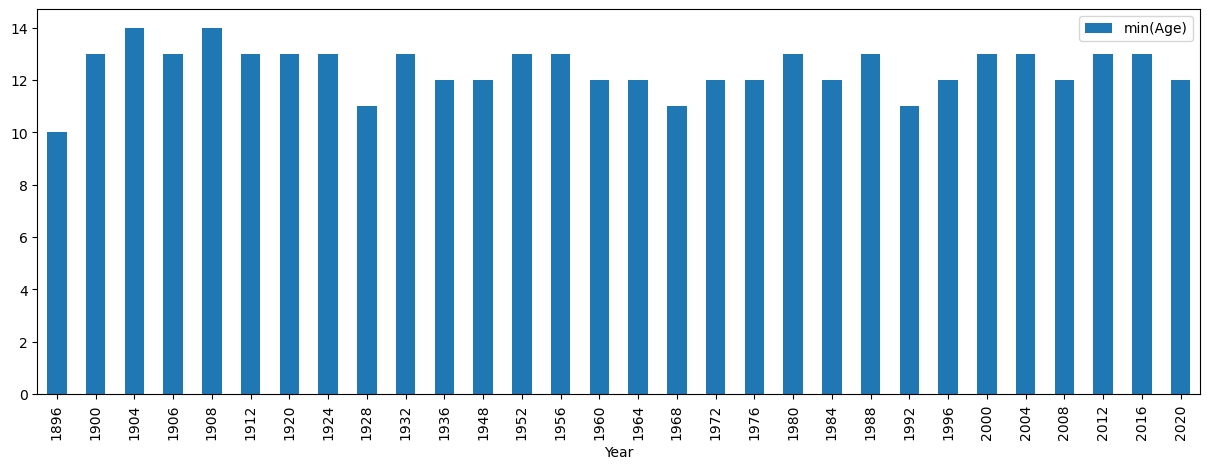

In [122]:
min_age_per_IO = summer_athletes.groupBy("Year", ).min("Age")

min_age_per_IO.show()
min_age_per_IO = min_age_per_IO.orderBy("Year", ascending=True)
min_age_per_IO_pd = min_age_per_IO.toPandas()
min_age_per_IO_pd.plot(kind='bar', x="Year", y="min(Age)", figsize=(15,5))

# Time 0.9s

+----+--------+
|Year|max(Age)|
+----+--------+
|1896|    40.0|
|1924|    81.0|
|1908|    61.0|
|1952|    65.0|
|1956|    67.0|
|1988|    70.0|
|1968|    68.0|
|1904|    71.0|
|2004|    57.0|
|1932|    96.0|
|1996|    63.0|
|1960|    65.0|
|2012|    71.0|
|1912|    67.0|
|2016|    62.0|
|1936|    74.0|
|1920|    72.0|
|1906|    54.0|
|1980|    70.0|
|1972|    69.0|
+----+--------+
only showing top 20 rows



<AxesSubplot:xlabel='Year'>

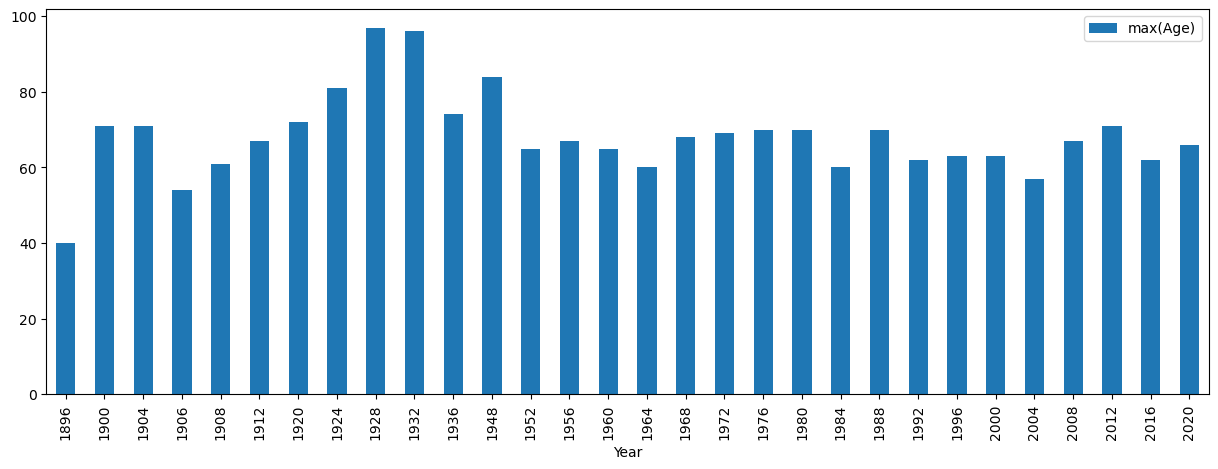

In [123]:
min_age_per_IO = summer_athletes.groupBy("Year", ).max("Age")

min_age_per_IO.show()
min_age_per_IO = min_age_per_IO.orderBy("Year", ascending=True)
min_age_per_IO_pd = min_age_per_IO.toPandas()
min_age_per_IO_pd.plot(kind='bar', x="Year", y="max(Age)", figsize=(15,5))

# Time 0.9s


In [124]:
summer_athletes.select(corr("Age", "Year")).show()

# Time 0.1s

+--------------------+
|     corr(Age, Year)|
+--------------------+
|-0.10625337447190572|
+--------------------+



In [125]:
athletes_per_sex = summer_athletes.groupBy("Sex").count()

athletes_per_sex.show()

# Time 0.1s

+---+------+
|Sex| count|
+---+------+
|  F| 66709|
|  M|170964|
+---+------+



<AxesSubplot:ylabel='count'>

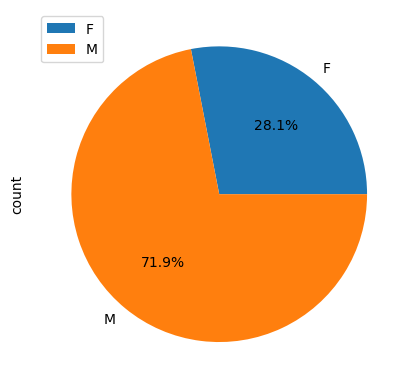

In [135]:
athletes_per_sex_pd = athletes_per_sex.toPandas()

athletes_per_sex_pd.plot(kind="pie", y="count", labels=athletes_per_sex_pd["Sex"], autopct="%1.1f%%")

# Time 0.1s

In [8]:
games = summer_athletes.groupBy("Games").count()
games.orderBy("Games", ascending=True).show()

# Time = 2.5s

+-----------+-----+
|      Games|count|
+-----------+-----+
|1896 Summer|  380|
|1900 Summer| 1936|
|1904 Summer| 1301|
|1906 Summer| 1733|
|1908 Summer| 3101|
|1912 Summer| 4040|
|1920 Summer| 4292|
|1924 Summer| 5233|
|1928 Summer| 4992|
|1932 Summer| 2969|
|1936 Summer| 6506|
|1948 Summer| 6405|
|1952 Summer| 8270|
|1956 Summer| 5127|
|1960 Summer| 8119|
|1964 Summer| 7702|
|1968 Summer| 8588|
|1972 Summer|10304|
|1976 Summer| 8641|
|1980 Summer| 7191|
+-----------+-----+
only showing top 20 rows



<AxesSubplot:xlabel='Games'>

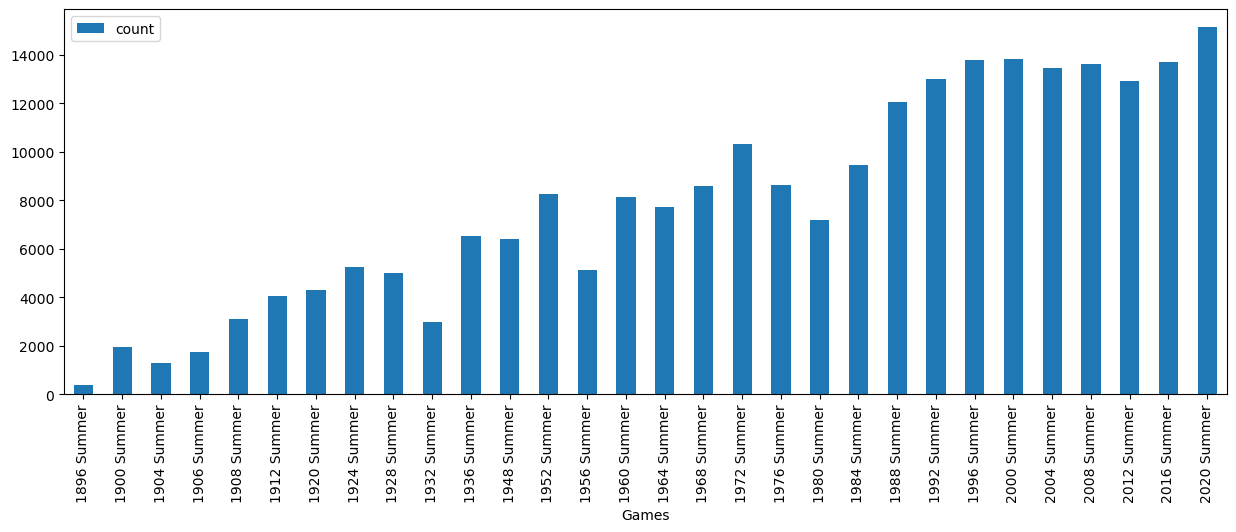

In [15]:
games = games.orderBy("Games", ascending=True)
games_pd = games.toPandas()

games_pd.plot(kind='bar', x='Games', y='count', figsize=(15,5))

# Time = 1.7s

In [18]:
athletes_per_city = summer_athletes.groupBy("City").count()
athletes_per_city = athletes_per_city.orderBy("count")
athletes_per_city.show()

# Time = 0.7s

+--------------+-----+
|          City|count|
+--------------+-----+
|     St. Louis| 1301|
|     Antwerpen| 4292|
|     Stockholm| 4338|
|     Melbourne| 4829|
|     Amsterdam| 4992|
|        Berlin| 6506|
|         Paris| 7169|
|        Moskva| 7191|
|          Roma| 8119|
|      Helsinki| 8270|
|   Mexico City| 8588|
|      Montreal| 8641|
|        Munich|10304|
|         Seoul|12037|
|   Los Angeles|12423|
|     Barcelona|12977|
|       Beijing|13602|
|Rio de Janeiro|13688|
|       Atlanta|13780|
|        Sydney|13821|
+--------------+-----+
only showing top 20 rows



In [21]:
athletes_per_city_pd = athletes_per_city.toPandas()

athletes_per_city_pd.plot(kind='pie',y='count', labels=athletes_per_city_pd["City"], figsize=(15,5))

# Time = 1.2s

ConnectionRefusedError: [WinError 10061] Nie można nawiązać połączenia, ponieważ komputer docelowy aktywnie go odmawia